# CA Recall Simulation Spatial Model Visualization

In [2]:
# import the voting methods
from pref_voting.voting_methods import *

import math
import pandas as pd
from itertools import product, combinations
from scipy.stats import sem
from functools import partial
from multiprocess import Pool, cpu_count
import pickle
import timeit

import copy
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pref_voting.generate_spatial_profiles import *
sns.set()
from pref_voting.analysis import estimated_std_error
import numpy as np
from tqdm.notebook import tqdm
from pref_voting.generate_spatial_profiles import *
from pref_voting.spatial_profiles import *
from pref_voting.utility_functions import *

## 2 Clump Example

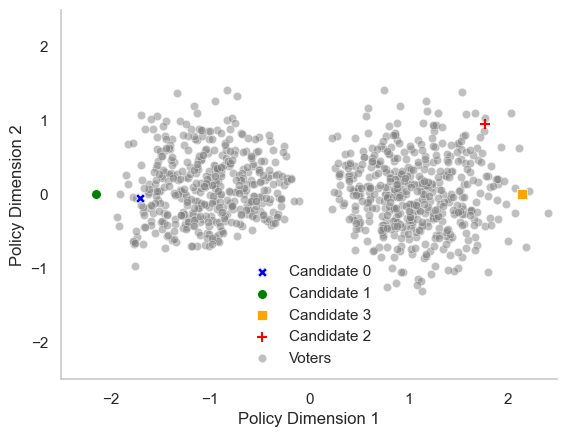

In [3]:

# white background

sns.set_style("whitegrid")
sprof_to_display = pickle.load(open("sprof_2_clump.pickle", "rb"))
# Scatter plots
sns.scatterplot(
    x=[sprof_to_display.voter_position(v)[0] for v in sprof_to_display.voters], 
    y=[sprof_to_display.voter_position(v)[1] for v in sprof_to_display.voters], 
    color="gray", alpha=0.5, label="Voters"
)

cand = 0
sns.scatterplot(
    x=[sprof_to_display.candidate_position(cand)[0]], 
    y=[sprof_to_display.candidate_position(cand)[1]], 
    color="blue", marker='X', s=50, label="Candidate 0"
)

cand = 1
sns.scatterplot(
    x=[sprof_to_display.candidate_position(cand)[0]], 
    y=[sprof_to_display.candidate_position(cand)[1]], 
    color="green", marker='o', s=50, label="Candidate 1"
)

cand = 2
sns.scatterplot(
    x=[sprof_to_display.candidate_position(cand)[0]], 
    y=[sprof_to_display.candidate_position(cand)[1]], 
    color="red", marker='+', linewidth=1.5, s=50, label="Candidate 2"
)

cand = 3
sns.scatterplot(
    x=[sprof_to_display.candidate_position(cand)[0]], 
    y=[sprof_to_display.candidate_position(cand)[1]], 
    color="orange", marker='s', label="Candidate 3", s=50
)

# Set labels for axes
plt.xlabel('Policy Dimension 1')
plt.ylabel('Policy Dimension 2')

# Retrieve and reorder legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 2, 4, 3, 0]  # Example order: "Candidate 1", "Candidate 2", "Candidate 4", "Candidate 3", "Voters"

# Apply reordered legend
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], frameon=False)

plt.ylim(-2.5, 2.5)
plt.xlim(-2.5, 2.5)
plt.grid(False)
sns.despine()

# Save and show the plot
plt.savefig("graphs/polarized_spatial_profile.pdf")
plt.show()


## 3 Clump Example

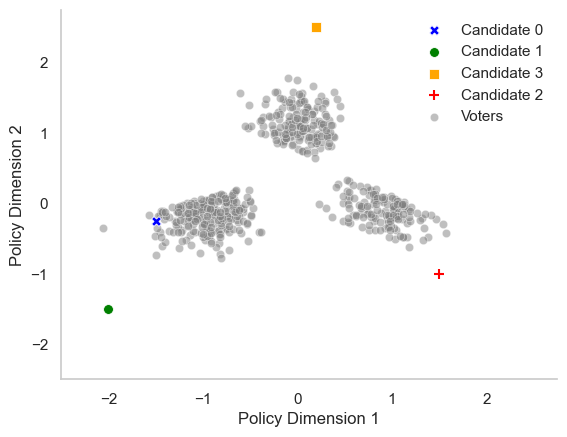

In [9]:

sns.set_style("whitegrid")
sprof_to_display = pickle.load(open("sprof_3_clump.pickle", "rb"))
# Scatter plots


sns.scatterplot(
    x=[sprof_to_display.voter_position(v)[0] for v in sprof_to_display.voters], 
    y=[sprof_to_display.voter_position(v)[1] for v in sprof_to_display.voters], 
    color="gray", alpha=0.5, label="Voters"
)

cand = 0
sns.scatterplot(
    x=[sprof_to_display.candidate_position(cand)[0]], 
    y=[sprof_to_display.candidate_position(cand)[1]], 
    color="blue", marker='X', s=50, label="Candidate 0"
)

cand = 1
sns.scatterplot(
    x=[sprof_to_display.candidate_position(cand)[0]], 
    y=[sprof_to_display.candidate_position(cand)[1]], 
    color="green", marker='o', s=50, label="Candidate 1"
)

cand = 2
sns.scatterplot(
    x=[sprof_to_display.candidate_position(cand)[0]], 
    y=[sprof_to_display.candidate_position(cand)[1]], 
    color="red", marker='+', linewidth=1.5, s=50, label="Candidate 2"
)

cand = 3
sns.scatterplot(
    x=[sprof_to_display.candidate_position(cand)[0]], 
    y=[sprof_to_display.candidate_position(cand)[1]], 
    color="orange", marker='s', label="Candidate 3", s=50
)

# Set labels for axes
plt.xlabel('Policy Dimension 1')
plt.ylabel('Policy Dimension 2')

# Retrieve and reorder legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 2, 4, 3, 0]  # Example order: "Candidate 1", "Candidate 2", "Candidate 4", "Candidate 3", "Voters"

# Apply reordered legend
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], frameon=False)

plt.ylim(-2.5, 2.75)
plt.xlim(-2.5, 2.75)
plt.grid(False)
sns.despine()

# Save and show the plot
plt.savefig(f"graphs/polarized_spatial_profile.pdf")
plt.show()


## Figure 9

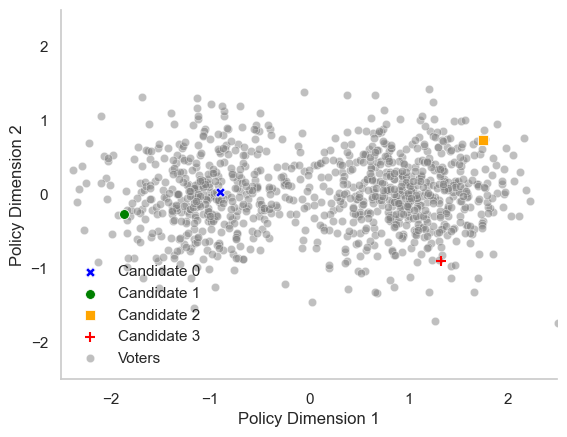

In [8]:
sns.set_style("whitegrid")
sprof = pickle.load(open("spatial_prof_example_figure9.pickle", "rb"))
sprof_to_display = sprof
# Scatter plots
sns.scatterplot(
    x=[sprof_to_display.voter_position(v)[0] for v in sprof_to_display.voters], 
    y=[sprof_to_display.voter_position(v)[1] for v in sprof_to_display.voters], 
    color="gray", alpha=0.5, label="Voters"
)

cand = 0
sns.scatterplot(
    x=[sprof_to_display.candidate_position(cand)[0]], 
    y=[sprof_to_display.candidate_position(cand)[1]], 
    color="blue", marker='X', s=50, label="Candidate 0"
)

cand = 1
sns.scatterplot(
    x=[sprof_to_display.candidate_position(cand)[0]], 
    y=[sprof_to_display.candidate_position(cand)[1]], 
    color="green", marker='o', s=50, label="Candidate 1"
)

cand = 2
sns.scatterplot(
    x=[sprof_to_display.candidate_position(cand)[0]], 
    y=[sprof_to_display.candidate_position(cand)[1]], 
    color="red", marker='+', linewidth=1.5, s=50, label="Candidate 3"
)

cand = 3
sns.scatterplot(
    x=[sprof_to_display.candidate_position(cand)[0]], 
    y=[sprof_to_display.candidate_position(cand)[1]], 
    color="orange", marker='s', label="Candidate 2", s=50
)

# Set labels for axes
plt.xlabel('Policy Dimension 1')
plt.ylabel('Policy Dimension 2')

# Retrieve and reorder legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 2, 4, 3, 0]  # Example order: "Candidate 1", "Candidate 2", "Candidate 4", "Candidate 3", "Voters"

# Apply reordered legend
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], frameon=False, loc='lower left')

plt.ylim(-2.5, 2.5)
plt.xlim(-2.5, 2.5)
plt.grid(False)
sns.despine()

# Save and show the plot
plt.savefig("graphs/polarized_spatial_profile_0.5.pdf", bbox_inches='tight')
plt.show()
